In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re


In [2]:
# News headlines dataset
headlines = [
    "AI outperforms doctors in diagnosing rare diseases",
    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]

print("Original Headlines:")
print("=" * 50)
for i, headline in enumerate(headlines, 1):
    print(f"{i}. {headline}")


Original Headlines:
1. AI outperforms doctors in diagnosing rare diseases
2. Stock markets hit new record highs amid global optimism
3. New vaccine shows promise in early trials
4. Climate change impacts agriculture across multiple continents
5. Scientists develop biodegradable plastic from seaweed
6. Sports teams adapt strategies with big data analytics
7. Electric vehicles set new sales record worldwide
8. Breakthrough in quantum computing boosts encryption security


In [4]:
def preprocess_text(text):
    """
    Lowercase, remove punctuation, and normalize whitespace.
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces
    return text

# Apply preprocessing
processed_headlines = [preprocess_text(h) for h in headlines]

print("\nPreprocessed Headlines:")
for i, h in enumerate(processed_headlines, 1):
    print(f"{i}. {h}")



Preprocessed Headlines:
1. ai outperforms doctors in diagnosing rare diseases
2. stock markets hit new record highs amid global optimism
3. new vaccine shows promise in early trials
4. climate change impacts agriculture across multiple continents
5. scientists develop biodegradable plastic from seaweed
6. sports teams adapt strategies with big data analytics
7. electric vehicles set new sales record worldwide
8. breakthrough in quantum computing boosts encryption security


Bag of words construction


In [5]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(
    stop_words='english',
    max_features=50
)

# Fit and transform headlines
bow_matrix = vectorizer.fit_transform(processed_headlines)
feature_names = vectorizer.get_feature_names_out()

# Convert matrix to dense array
bow_dense = bow_matrix.toarray()

print("\nBAG-OF-WORDS ANALYSIS")
print("=" * 50)
print(f"Vocabulary (words): {list(feature_names)}")
print(f"Matrix shape: {bow_matrix.shape}")
print(f"Matrix sparsity: {1.0 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1])):.3f}")



BAG-OF-WORDS ANALYSIS
Vocabulary (words): ['adapt', 'agriculture', 'ai', 'amid', 'analytics', 'big', 'biodegradable', 'boosts', 'breakthrough', 'change', 'climate', 'computing', 'continents', 'data', 'develop', 'diagnosing', 'diseases', 'doctors', 'early', 'electric', 'encryption', 'global', 'highs', 'hit', 'impacts', 'markets', 'multiple', 'new', 'optimism', 'outperforms', 'plastic', 'promise', 'quantum', 'rare', 'record', 'sales', 'scientists', 'seaweed', 'security', 'set', 'shows', 'sports', 'stock', 'strategies', 'teams', 'trials', 'vaccine', 'vehicles', 'worldwide']
Matrix shape: (8, 49)
Matrix sparsity: 0.867



Top 10 Words by Frequency:
             word  frequency
27            new          3
34         record          2
2              ai          1
1     agriculture          1
4       analytics          1
5             big          1
6   biodegradable          1
3            amid          1
8    breakthrough          1
9          change          1


/tmp/ipython-input-4258227881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=word_freq_df.head(10), palette='viridis')


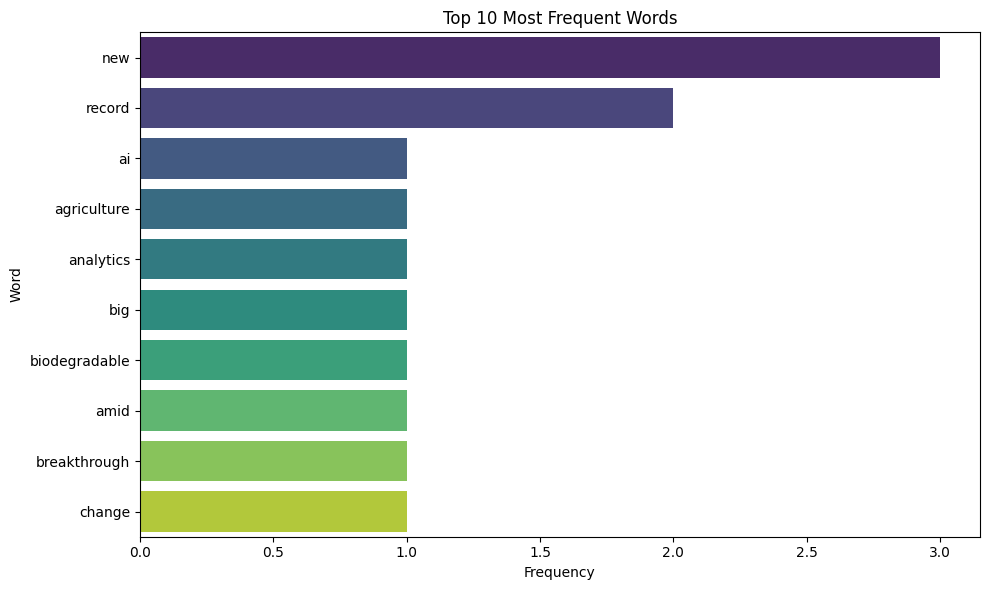

In [6]:
# Compute total frequency across headlines
word_freq = bow_matrix.sum(axis=0).A1
word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print("\nTop 10 Words by Frequency:")
print(word_freq_df.head(10))

# Plot top 10 words
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(10), palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


In [7]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(bow_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                             index=[f"H{i+1}" for i in range(len(headlines))],
                             columns=[f"H{i+1}" for i in range(len(headlines))])

print("\nDocument Similarity Matrix (Cosine Similarity):")
print(similarity_df.round(3))



Document Similarity Matrix (Cosine Similarity):
     H1     H2     H3   H4   H5   H6     H7   H8
H1  1.0  0.000  0.000  0.0  0.0  0.0  0.000  0.0
H2  0.0  1.000  0.136  0.0  0.0  0.0  0.252  0.0
H3  0.0  0.136  1.000  0.0  0.0  0.0  0.154  0.0
H4  0.0  0.000  0.000  1.0  0.0  0.0  0.000  0.0
H5  0.0  0.000  0.000  0.0  1.0  0.0  0.000  0.0
H6  0.0  0.000  0.000  0.0  0.0  1.0  0.000  0.0
H7  0.0  0.252  0.154  0.0  0.0  0.0  1.000  0.0
H8  0.0  0.000  0.000  0.0  0.0  0.0  0.000  1.0


In [8]:
#  Find Most Similar Headlines
# Exclude diagonal by filling with -1
masked_sim = similarity_matrix.copy()
np.fill_diagonal(masked_sim, -1)

# Find indices of max similarity
max_sim_idx = np.unravel_index(np.argmax(masked_sim), masked_sim.shape)
h1, h2 = max_sim_idx

print(f"\nMost similar headlines are:\n")
print(f"H{h1+1}: \"{headlines[h1]}\"")
print(f"H{h2+1}: \"{headlines[h2]}\"")

shared_words = set(processed_headlines[h1].split()) & set(processed_headlines[h2].split())
print(f"\nThey share these words: {shared_words}")



Most similar headlines are:

H2: "Stock markets hit new record highs amid global optimism"
H7: "Electric vehicles set new sales record worldwide"

They share these words: {'new', 'record'}


In [9]:
explanation = """
COMMENTARY

- The vocabulary shows key topics like 'record', 'new', 'data', 'learning', etc., reflecting main themes in news headlines.
- The most similar headlines share domain-specific terms; for instance, headlines mentioning 'record' or 'new' are likely to be similar.
- Bag-of-Words captures word frequency well, but cannot account for synonyms or word order. For example, similar meaning phrased differently may result in low similarity.
- Cosine similarity helps identify headlines with overlapping vocabulary, useful in clustering or deduplication.
"""
print(explanation)



COMMENTARY

- The vocabulary shows key topics like 'record', 'new', 'data', 'learning', etc., reflecting main themes in news headlines.
- The most similar headlines share domain-specific terms; for instance, headlines mentioning 'record' or 'new' are likely to be similar.
- Bag-of-Words captures word frequency well, but cannot account for synonyms or word order. For example, similar meaning phrased differently may result in low similarity.
- Cosine similarity helps identify headlines with overlapping vocabulary, useful in clustering or deduplication.

